Scrapping Data from the website of **Cars.com** and Tabulating the Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
import re

# URL of the website to scrape
url = "https://www.cars.com/shopping/results/?stock_type=used&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip="

# Send a GET request to the website
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all the car listings on the page
car_listings = soup.find_all("div", class_="vehicle-card")

# Create an empty DataFrame to store the data
car_data = pd.DataFrame(columns=["Name", "Price", "Dealer", "Rating", "Mileage", "Comments"])

# Iterate over each car listing and extract the required information
for car in car_listings:
    # Extract the name of the car if it exists
    name_element = car.find("h2", class_="title")
    name = name_element.text.strip() if name_element else "N/A"

    # Extract the price of the car if it exists
    price_element = car.find("span", class_="primary-price")
    price = price_element.text.strip() if price_element else "N/A"

    # Remove dollar signs and commas from the "Price" column and convert to numeric
    price = float(re.sub('[\$,]', '', price))

    # Extract the price of the car if it exists
    dealer_element = car.find('div', class_="dealer-name")
    dealer = dealer_element.text.strip() if dealer_element else "N/A"

    # Extract the rating of the car if it exists
    rating_element = car.find("span", class_="sds-rating__count")
    rating = rating_element.text.strip() if rating_element else "N/A"

    # Extract the mileage of the car if it exists
    mileage_element = car.find("div", class_="mileage")
    mileage = mileage_element.text.strip() if mileage_element else "N/A"

    # Extract the number of comments for the car if it exists
    comments_element = car.find("span", class_="sds-rating__link sds-button-link")
    comments = comments_element.text.strip() if comments_element else "N/A"

    # Append the extracted information to the DataFrame
    car_data.loc[len(car_data)] = [name, price, dealer, rating, mileage, comments]

# Print the entire DataFrame

# Replace "N/A" with NaN for numerical columns
car_data["Price"] = car_data["Price"].replace("N/A", float("1"))
car_data["Rating"] = car_data["Rating"].replace("N/A", float("1"))

# Replace "N/A" with an empty string for text-based columns
car_data = car_data.fillna("")

# Print the entire DataFrame
df = pd.DataFrame(car_data)
table = tabulate(df, headers="keys", tablefmt="grid")
print(table)


+----+-------------------------------------------+---------+----------------------------------------------------+----------+-------------+-----------------+
|    | Name                                      |   Price | Dealer                                             |   Rating | Mileage     | Comments        |
+====+===========================================+=========+====================================================+==========+=============+=================+
|  0 | 2023 Mercedes-Benz Maybach GLS 600 4MATIC |  187995 | Mercedes-Benz of South Charlotte                   |      1   | 1,343 mi.   | N/A             |
+----+-------------------------------------------+---------+----------------------------------------------------+----------+-------------+-----------------+
|  1 | 2021 Mercedes-Benz AMG C 43 Base 4MATIC   |   54907 | DallasLeaseReturns.com                             |      5   | 21,633 mi.  | (6,125 reviews) |
+----+-------------------------------------------+--------

In this Step we calculate:
*   Mean
*   Median
*   Minimum Value
*   Maximum Value
*   Standard Deviation









In [ ]:
import pandas as pd
from tabulate import tabulate

# Convert "Price" and "Rating" columns to numeric
car_data["Price"] = pd.to_numeric(car_data["Price"], errors="coerce")
car_data["Rating"] = pd.to_numeric(car_data["Rating"], errors="coerce")

# Calculate the total number of comments and the most frequent comment
total_comments = car_data["Comments"].count()
most_frequent_comment = car_data["Comments"].mode().iloc[0] if total_comments > 0 else ""

# Create a DataFrame for the statistical results
statistics_data = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Std Deviation", "Min", "Max", "Total Comments", "Most Frequent Comment"],
    "Price": [
        car_data["Price"].mean(),
        car_data["Price"].median(),
        car_data["Price"].std(),
        car_data["Price"].min(),
        car_data["Price"].max(),
        "",
        ""
    ],
    "Rating": [
        car_data["Rating"].mean(),
        car_data["Rating"].median(),
        car_data["Rating"].std(),
        car_data["Rating"].min(),
        car_data["Rating"].max(),
        "",
        ""
    ],
    "Comments": [
        "",
        "",
        "",
        "",
        "",
        total_comments,
        most_frequent_comment
    ]
})

# Print the tabulated statistical results
table = tabulate(statistics_data, headers="keys", tablefmt="grid")
print(table)


+----+-----------------------+--------------------+--------------------+-------------+
|    | Statistic             | Price              | Rating             | Comments    |
+====+=======================+====================+====================+=============+
|  0 | Mean                  | 56702.619047619046 | 3.5857142857142863 |             |
+----+-----------------------+--------------------+--------------------+-------------+
|  1 | Median                | 43464.0            | 4.3                |             |
+----+-----------------------+--------------------+--------------------+-------------+
|  2 | Std Deviation         | 47632.90447524294  | 1.5752097366019913 |             |
+----+-----------------------+--------------------+--------------------+-------------+
|  3 | Min                   | 11995.0            | 1.0                |             |
+----+-----------------------+--------------------+--------------------+-------------+
|  4 | Max                   | 187995.0    

Preparing a **Plot Chart** and a **Histogram** for the Distribution of Car Prices






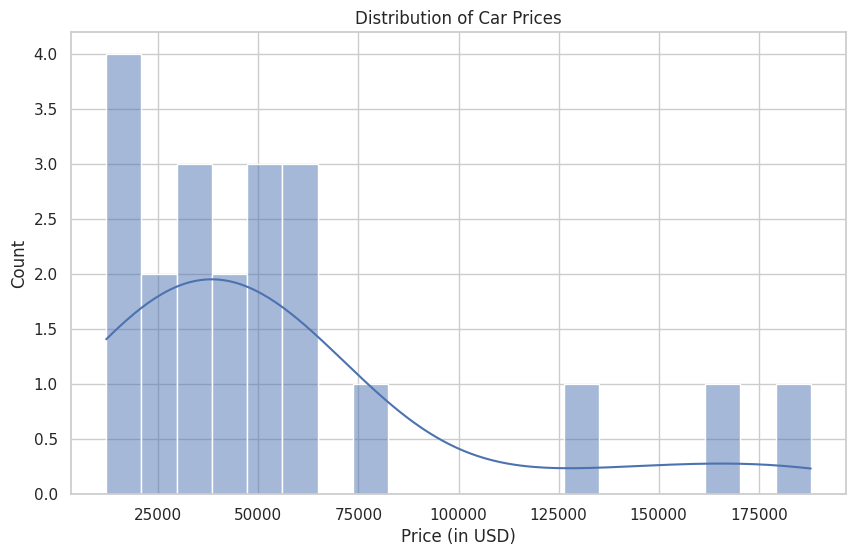

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Histogram of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(data=car_data, x="Price", bins=20, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (in USD)")
plt.ylabel("Count")
plt.show()



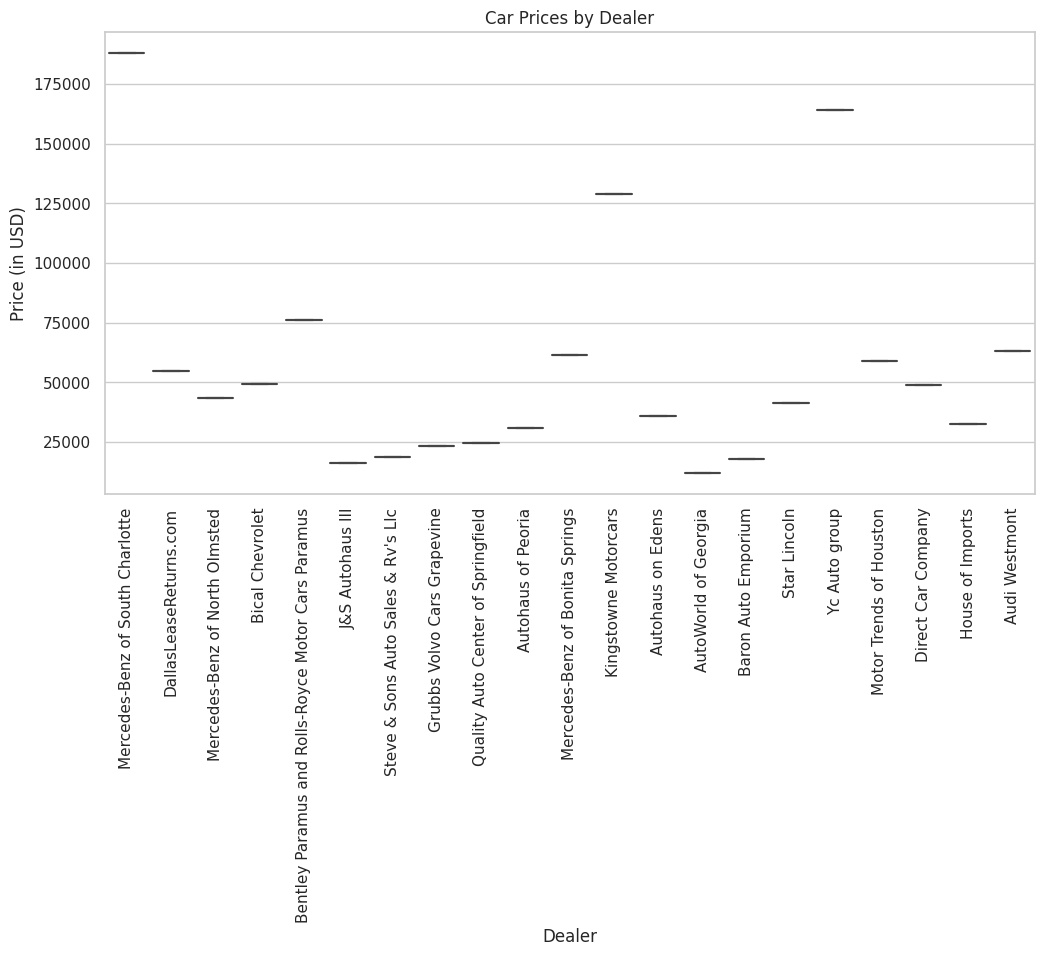

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualization 3: Box Plot of Car Prices by Dealer
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data, x="Dealer", y="Price")
plt.title("Car Prices by Dealer")
plt.xlabel("Dealer")
plt.ylabel("Price (in USD)")
plt.xticks(rotation=90)
plt.show()



Preparing a **Bar Graph** for the Analysis Rating done by Dealer

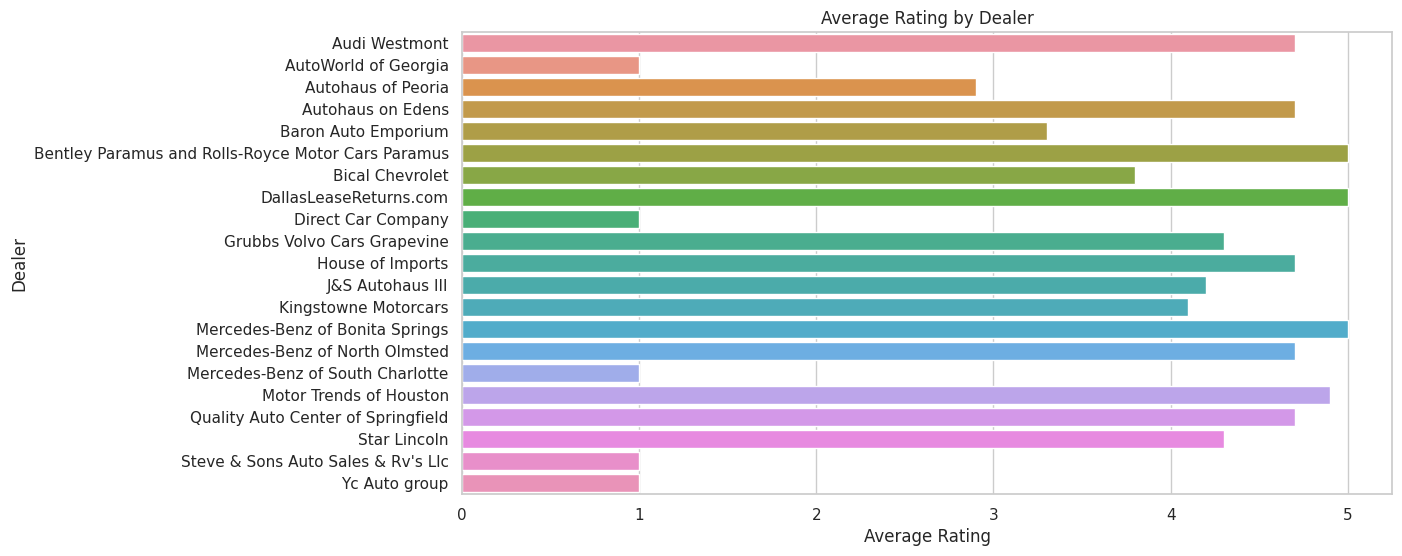

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 5: Bar Plot of Average Rating by Dealer
average_rating_by_dealer = car_data.groupby("Dealer")["Rating"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating_by_dealer, x="Rating", y="Dealer", orient="h")
plt.title("Average Rating by Dealer")
plt.xlabel("Average Rating")
plt.ylabel("Dealer")
plt.show()

**Milage Analysis**

**Summary Statistics:**
Calculate basic statistics such as mean, median, standard deviation, minimum, and maximum mileage values to understand the central tendency and variability of the data.

**Histogram:**
Create a histogram to visualize the distribution of mileage values. This will help you see how mileage is distributed across the cars in your dataset.

**Box Plot:**
A box plot can show the distribution of mileage while highlighting potential outliers.

**Plot Chart and Box Plot** for the Distribution of Mileage for the Cars

Mean Mileage: 43897.10 miles
Median Mileage: 33256.00 miles
Standard Deviation of Mileage: 34252.89 miles
Minimum Mileage: 264.00 miles
Maximum Mileage: 130692.00 miles


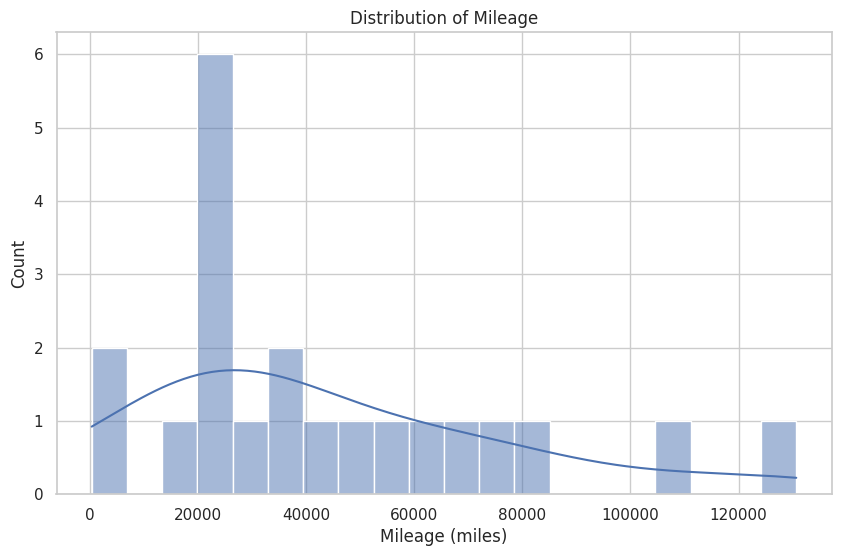

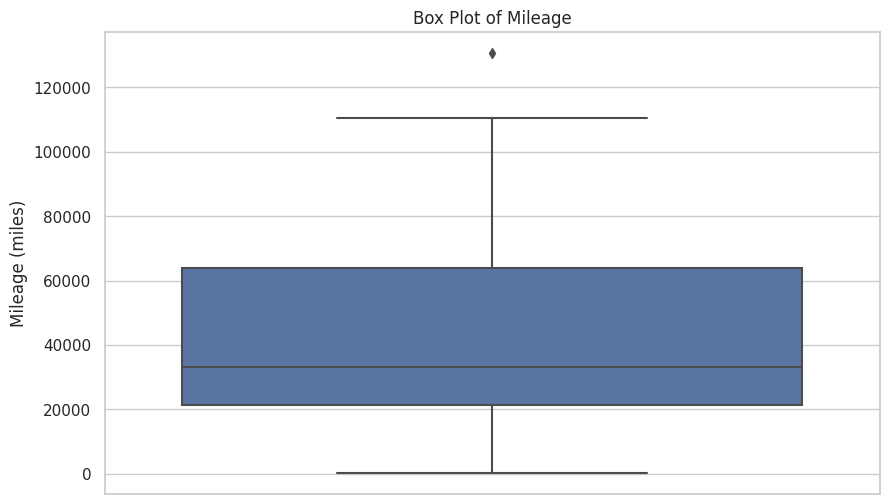

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Summary Statistics
mileage_mean = car_data["Mileage"].mean()
mileage_median = car_data["Mileage"].median()
mileage_std = car_data["Mileage"].std()
mileage_min = car_data["Mileage"].min()
mileage_max = car_data["Mileage"].max()

print(f"Mean Mileage: {mileage_mean:.2f} miles")
print(f"Median Mileage: {mileage_median:.2f} miles")
print(f"Standard Deviation of Mileage: {mileage_std:.2f} miles")
print(f"Minimum Mileage: {mileage_min:.2f} miles")
print(f"Maximum Mileage: {mileage_max:.2f} miles")

# Visualization 1: Histogram of Mileage
plt.figure(figsize=(10, 6))
sns.histplot(data=car_data, x="Mileage", bins=20, kde=True)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage (miles)")
plt.ylabel("Count")
plt.show()

# Visualization 2: Box Plot of Mileage
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_data, y="Mileage")
plt.title("Box Plot of Mileage")
plt.ylabel("Mileage (miles)")
plt.show()


**Define Price Ranges:**
 Decide on the price ranges you want to use for your analysis. For example, you can create ranges like "Under $10,000," "$10,000 - $20,000," "$20,000 - $30,000," and so on.

**Segment Data:** Create a new column in your DataFrame to categorize each car into its corresponding price range based on the defined criteria.

**Analyze and Visualize:**

Calculate the count of cars in each price range.
Calculate summary statistics for each price range, such as the mean, median, and standard deviation of prices.
Create visualizations, such as a bar chart, to visualize the distribution of cars across price ranges.

Preparing a **Bar Graph** for the Car Count by Price Range

Calculating:
*   Mean
*   Standard Deviation
*   Minimum Value






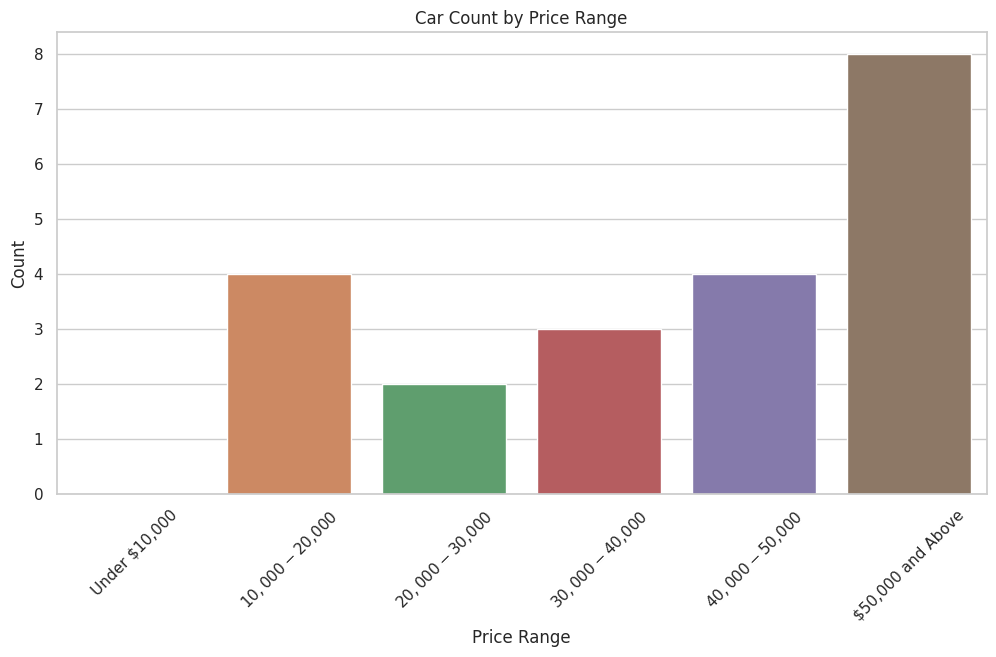

+----+-------------------+---------+---------+-----------+-------+---------+---------+----------+--------+
|    | Price Range       |   count |    mean |       std |   min |     25% |     50% |      75% |    max |
+====+===================+=========+=========+===========+=======+=========+=========+==========+========+
|  0 | $10,000 - $20,000 |       4 | 16221.2 |  3067.8   | 11995 | 14995   | 16995   |  18221.2 |  18900 |
+----+-------------------+---------+---------+-----------+-------+---------+---------+----------+--------+
|  1 | $20,000 - $30,000 |       2 | 23943.5 |   911.461 | 23299 | 23621.2 | 23943.5 |  24265.8 |  24588 |
+----+-------------------+---------+---------+-----------+-------+---------+---------+----------+--------+
|  2 | $30,000 - $40,000 |       3 | 33114.3 |  2585.8   | 30825 | 31712   | 32599   |  34259   |  35919 |
+----+-------------------+---------+---------+-----------+-------+---------+---------+----------+--------+
|  3 | $40,000 - $50,000 |       4 | 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Define the price ranges
price_ranges = [
    ("Under $10,000", 10000),
    ("$10,000 - $20,000", 20000),
    ("$20,000 - $30,000", 30000),
    ("$30,000 - $40,000", 40000),
    ("$40,000 - $50,000", 50000),
    ("$50,000 and Above", float("inf"))
]

# Function to categorize cars into price ranges
def categorize_price(price):
    for range_name, range_max in price_ranges:
        if price <= range_max:
            return range_name
    return "N/A"

# Create a new column for price ranges
car_data["Price Range"] = car_data["Price"].apply(categorize_price)

# Visualization: Bar chart of car count by price range
plt.figure(figsize=(12, 6))
sns.countplot(data=car_data, x="Price Range", order=[range_name for range_name, _ in price_ranges])
plt.title("Car Count by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



# Convert the summary statistics to a DataFrame
price_range_summary_df = price_range_summary.reset_index()

# Print the summary statistics in tabular form
table = tabulate(price_range_summary_df, headers="keys", tablefmt="grid")
print(table)
